In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
import warnings

In [2]:
filename = "/Users/sahithi/Desktop/dataset w7.csv"

In [3]:
df = pd.read_csv(filename)

In [4]:
df

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


In [7]:
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [6]:
df.tail()

,Gender,Test preparation,Total Marks
23,female,none,27
24,female,none,27
25,female,none,38
26,female,completed,50
27,female,completed,43


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [9]:
df.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

#  Carry out descriptive analytics on the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [11]:
df.Gender.value_counts()

female    16
male      12
Name: Gender, dtype: int64

In [12]:
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [14]:
df.rename(columns={"Total Marks":"Total_Marks"},inplace=True)

In [19]:
df["Total_Marks"].min()

12

In [20]:
df["Total_Marks"].max()

50

In [21]:
df["Total_Marks"].sum()

905

In [22]:
df["Total_Marks"].var()

155.11507936507937

In [23]:
df["Total_Marks"].std()

12.454520438984368

In [24]:
df["Total_Marks"].quantile([0.75,0.25,0.5,0.995])

0.750    43.25
0.250    22.50
0.500    33.00
0.995    49.73
Name: Total_Marks, dtype: float64

Text(0.5, 1.0, 'Graph of marks basis of gender and test preparation')

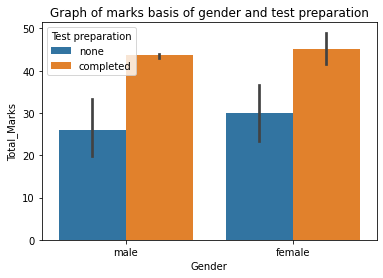

In [26]:
plt.figure()
sns.barplot(x='Gender',y='Total_Marks',data=df, hue='Test preparation')
plt.title('Graph of marks basis of gender and test preparation')

In [28]:
df.groupby('Gender')['Total_Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


In [30]:
df.groupby('Gender')['Test preparation'].describe()

,count,unique,top,freq
Gender,,,,
female,16,2,none,12
male,12,2,none,9


# Check whether female and male students scored the same marks.

H0: male and female students have scored the same marks

H1: male and female students scored different marks

In [34]:
male = df[df['Gender']=='male']['Total_Marks']
female = df[df['Gender']=='female']['Total_Marks']
alpha = .05
from scipy.stats import ttest_ind

In [50]:
H0= "male and female students have scored the same marks"

H1=  "male and female students scored different marks"

In [58]:
stat,p = ttest_ind(male,female,equal_var=False)
print("p value:",p)
if p < alpha:
    print("H0 is rejected, hence -",H1)
else:
    print("H1 is rejected, hence -",H0)

p value: 0.4906112127110316
H1 is rejected, hence - male and female students have scored the same marks


# Whether test preparation helps the students?

In [41]:
alpha=0.05

H0 : students scored good marks wothout test preparation

H1 : students scored good marks by test preparation

In [42]:
tpn = df[df['Test preparation']=='none']['Total_Marks']
tpc = df[df['Test preparation']=='completed']['Total_Marks']

In [47]:
H0 = "students scored good marks wothout test preparation"

H1 = "students scored good marks by test preparation"

In [57]:
stat,p = ttest_ind(tpn,tpc,equal_var=False)
print("p value:",p)
if p < alpha:
    print("H0 is rejected, hence -",H1)
else:
    print("H1 is rejected, hence -",H0)

p value: 4.884790752092096e-06
H0 is rejected, hence - male and female students scored different marks
